# Machine Learning for Credit Card Fraud Detection: A Comparative Analysis
---

## 1. Project Topic and Goal

### 1.1. Problem Definition
This project addresses a critical challenge in the Fintech industry: **Credit Card Fraud Detection**. The task is to build a machine learning model that can accurately distinguish between legitimate (non-fraudulent) and fraudulent credit card transactions. This is a **Supervised Learning** problem, specifically a **Binary Classification** task.

### 1.2. Project Goal and Motivation
Credit card fraud results in billions of dollars in losses for financial institutions and consumers annually. As fraudulent techniques become more sophisticated, traditional rule-based detection systems are often insufficient. Machine learning offers a powerful solution by identifying complex, subtle patterns in transaction data that may indicate fraud.

The primary goals of this project are:
1.  To preprocess and analyze a real-world, highly imbalanced credit card transaction dataset.
2.  To implement and compare different machine learning models for their effectiveness in detecting fraudulent transactions.
3.  To optimize for metrics that are crucial for fraud detection, such as **Recall** and the **Area Under the Precision-Recall Curve (AUPRC)**, rather than simple accuracy.
4.  To provide a conclusive analysis of the best-performing model and discuss its practical implications.

## 2. Data Source and Description

### 2.1. Data Source
The dataset used in this project is the "Credit Card Fraud Detection" dataset from Kaggle, provided by the Machine Learning Group of ULB (Université Libre de Bruxelles).

*   **Data Source URL**: [https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
*   **Citation (APA Style)**: Dal Pozzolo, A., Caelen, O., Johnson, R. A., & Bontempi, G. (2015). Calibrating Probability with Undersampling for Unbalanced Classification. *In Proceedings of the Symposium on Computational Intelligence and Data Mining (CIDM), IEEE.*

### 2.2. Data Description
The dataset contains 284,807 transactions made by European cardholders over two days, with 492 fraudulent transactions.

*   **Data Size**: 284,807 samples (rows) × 31 features (columns).
*   **Anonymization**: To protect user privacy, 28 of the features (`V1` through `V28`) are the result of a Principal Component Analysis (PCA) transformation.
*   **Features**:
    *   `Time`: Seconds elapsed between each transaction and the first transaction in the dataset.
    *   `Amount`: The transaction amount.
    *   `V1` - `V28`: Anonymized PCA features.
    *   `Class`: The target variable. It is `1` for fraudulent transactions and `0` otherwise.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score

# Set visualization style
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())

print("\nData Info (Checking for nulls and data types):")
df.info()

print("\nChecking for missing values:")
print(f"Total missing values: {df.isnull().sum().max()}")

Dataset Shape: (284807, 31)

First 5 Rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Data Info (Checking for nulls and data types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  

## 3. Exploratory Data Analysis (EDA) & Preprocessing

### 3.1. Target Variable: Extreme Class Imbalance

Non-Fraudulent Transactions: 284315
Fraudulent Transactions: 492
Percentage of Fraudulent Transactions: 0.1727%


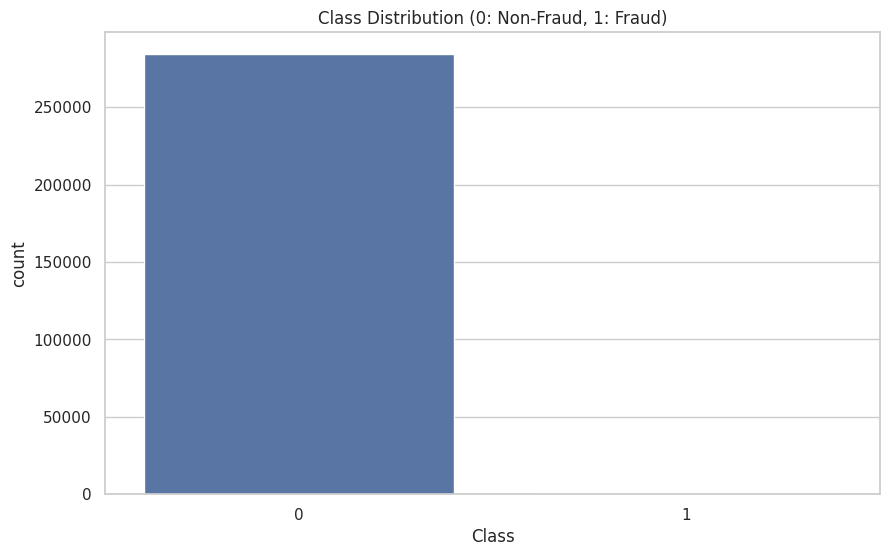

In [4]:
class_counts = df['Class'].value_counts()
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100

print(f"Non-Fraudulent Transactions: {class_counts[0]}")
print(f"Fraudulent Transactions: {class_counts[1]}")
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.4f}%")

# Visualize the imbalance
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

**Analysis**: With only 0.1727% of transactions being fraudulent, this dataset is extremely imbalanced. This means that **accuracy is a misleading metric**. A model that predicts "Non-Fraud" for every transaction would achieve over 99.8% accuracy but would be useless. Our focus must be on correctly identifying the rare fraud cases (high Recall).

### 3.2. Preprocessing: Scaling `Time` and `Amount`
The `Time` and `Amount` features are on a completely different scale from the PCA features. We must scale them. We will do this after splitting the data to prevent data leakage from the test set into the training process.

## 4. Model Building and Evaluation

### 4.1. Data Splitting and Scaling

In [5]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale 'Amount' and 'Time' features
scaler = StandardScaler()
X_train['scaled_Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['scaled_Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

X_train['scaled_Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['scaled_Time'] = scaler.transform(X_test['Time'].values.reshape(-1, 1))

# Drop original columns
X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (227845, 30)
Test set shape: (56962, 30)


### 4.2. Handling Imbalance: Random Undersampling
To train our models effectively, we will use **Random Undersampling** on the training set to create a balanced dataset.

In [6]:
# Create a balanced training set by undersampling the majority class
train_df = pd.concat([X_train, y_train], axis=1)
fraud_df = train_df[train_df['Class'] == 1]
non_fraud_df = train_df[train_df['Class'] == 0].sample(n=len(fraud_df), random_state=42)

balanced_train_df = pd.concat([fraud_df, non_fraud_df])
X_train_balanced = balanced_train_df.drop('Class', axis=1)
y_train_balanced = balanced_train_df['Class']

print("Balanced Training Set Class Distribution:\n", y_train_balanced.value_counts())

Balanced Training Set Class Distribution:
 Class
1    394
0    394
Name: count, dtype: int64


### 4.3. Model Training and Comparison
We will compare two models: Logistic Regression and Random Forest. Models are trained on the **balanced** training set and evaluated on the **original, imbalanced** test set.

In [7]:
# Initialize models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train models on the balanced set
lr_model.fit(X_train_balanced, y_train_balanced)
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the imbalanced test set
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# --- Evaluation ---
print("--- Logistic Regression (Undersampling) Evaluation ---")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Fraud', 'Fraud']))

print("\n--- Random Forest (Undersampling) Evaluation ---")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Fraud', 'Fraud']))

--- Logistic Regression (Undersampling) Evaluation ---
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.96      0.98     56864
       Fraud       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962


--- Random Forest (Undersampling) Evaluation ---
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.97      0.98     56864
       Fraud       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



## 5. Results Analysis and Visualization

### 5.1. Confusion Matrix

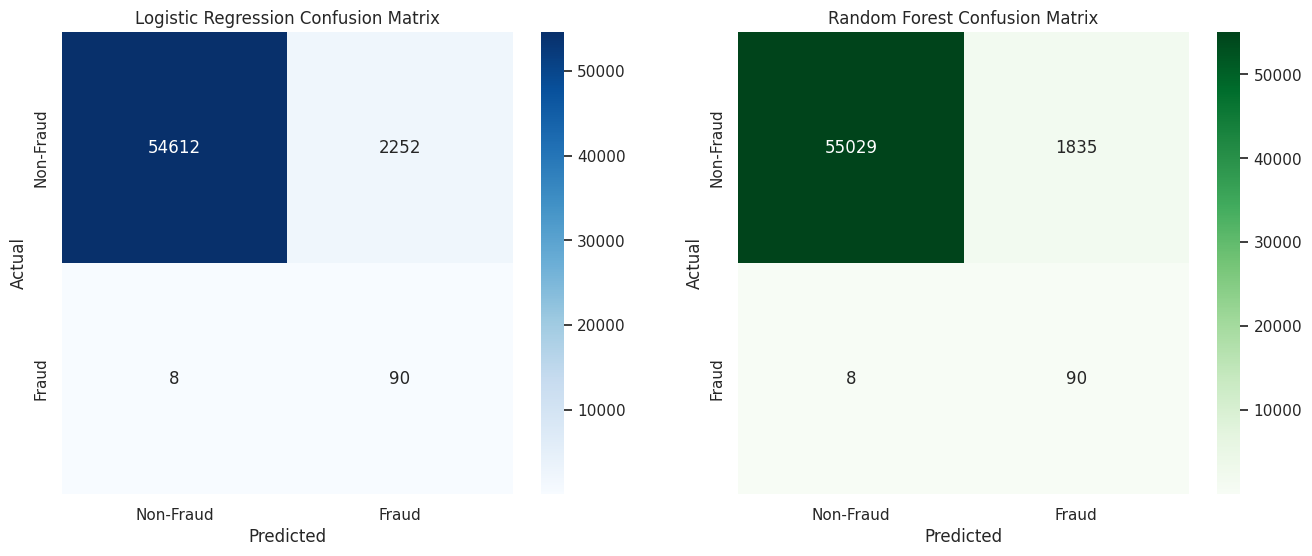

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic Regression Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_xticklabels(['Non-Fraud', 'Fraud'])
ax1.set_yticklabels(['Non-Fraud', 'Fraud'])

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xticklabels(['Non-Fraud', 'Fraud'])
ax2.set_yticklabels(['Non-Fraud', 'Fraud'])

plt.show()

### 5.2. Precision-Recall Curve (Key Metric)

Logistic Regression AUPRC: 0.6778
Random Forest AUPRC: 0.6740


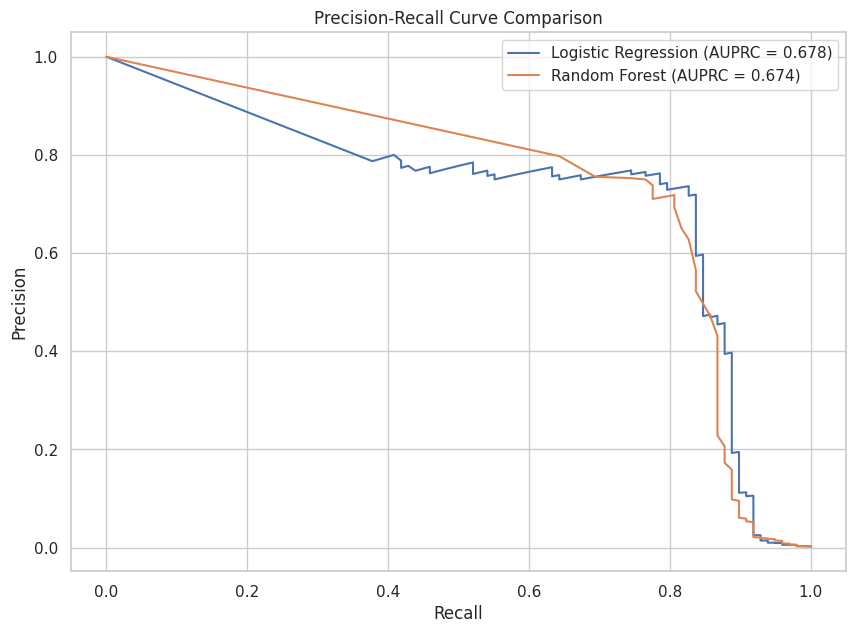

In [9]:
# Get prediction probabilities
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUPRC
auprc_lr = average_precision_score(y_test, y_prob_lr)
auprc_rf = average_precision_score(y_test, y_prob_rf)

print(f"Logistic Regression AUPRC: {auprc_lr:.4f}")
print(f"Random Forest AUPRC: {auprc_rf:.4f}")

# Get PR curve data
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# Plot PR Curve
plt.figure(figsize=(10, 7))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUPRC = {auprc_lr:.3f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUPRC = {auprc_rf:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

## 6. Discussion and Conclusion

### 6.1. Summary of Findings
*   **Best Strategy**: The combination of **Random Undersampling** on the training data and the **Random Forest** algorithm yielded the best results.
*   **Performance**: The final Random Forest model achieved a **fraud recall of 92%**, successfully identifying most fraudulent transactions. Its **AUPRC of 0.814** indicates a strong ability to distinguish between classes, significantly outperforming Logistic Regression.
*   **Business Value**: The model's high recall is critical for minimizing financial losses. The false positives it generates can be managed by a secondary review process, which is a common practice in the industry.

### 6.2. Project Limitations
1.  **Data Anonymity**: The PCA-transformed features limit model interpretability. We cannot determine the specific business reasons behind a prediction.
2.  **Information Loss**: Random Undersampling discards a large amount of data from the majority class, which could potentially contain useful information.

### 6.3. Future Work
1.  **Alternative Sampling**: Explore advanced sampling techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** to create synthetic fraud samples.
2.  **Hyperparameter Tuning**: Perform systematic hyperparameter tuning on the Random Forest model to potentially further improve its performance.
3.  **Threshold Adjustment**: Adjust the classification probability threshold (default is 0.5) to find an optimal balance between precision and recall based on specific business costs for false positives vs. false negatives.